# CNN Project CIFAR-10

> Indented block



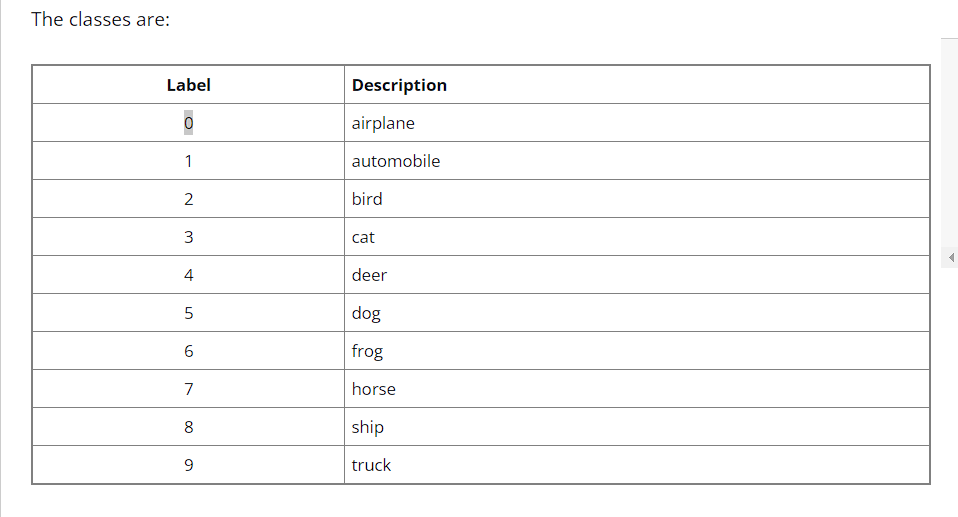

In [1]:
from keras.datasets import cifar10

In [2]:
(xtrain, ytrain), (xtest, ytest)=cifar10.load_data()

### Viewing top 9 labels

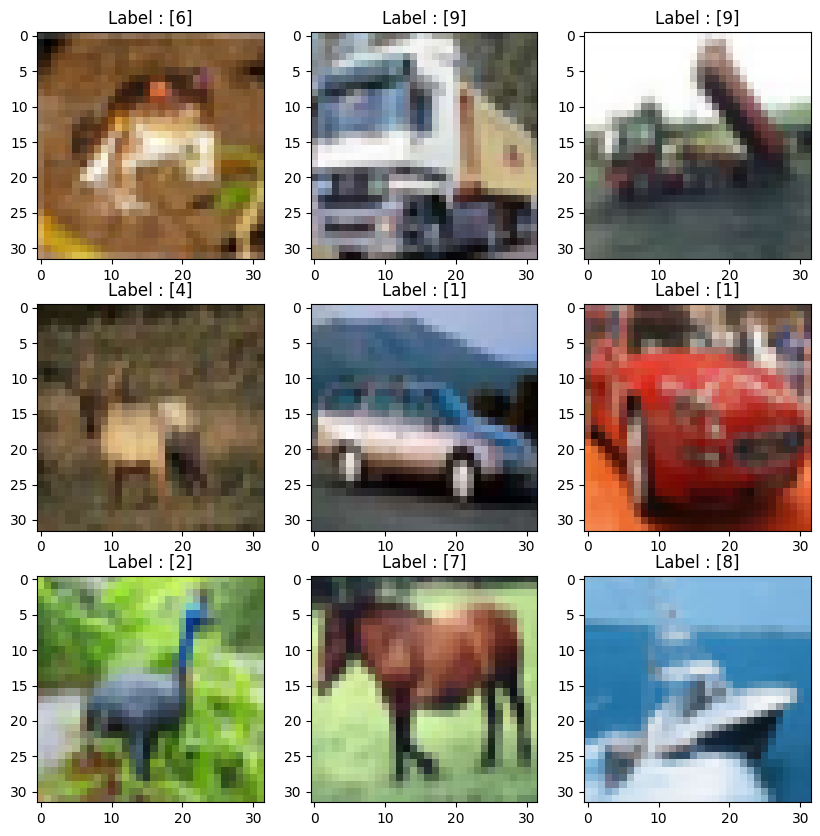

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i])
  plt.title(f'Label : {ytrain[i]}')
plt.show()

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
xtest.shape

(10000, 32, 32, 3)

### Preprocessing the data

In [6]:
xtrain[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [7]:
xtrain_scl = xtrain/255
xtest_scl = xtest/255


In [8]:
# Convert ytrain and ytest to categorical
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [9]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
ytrain_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Create your neural network

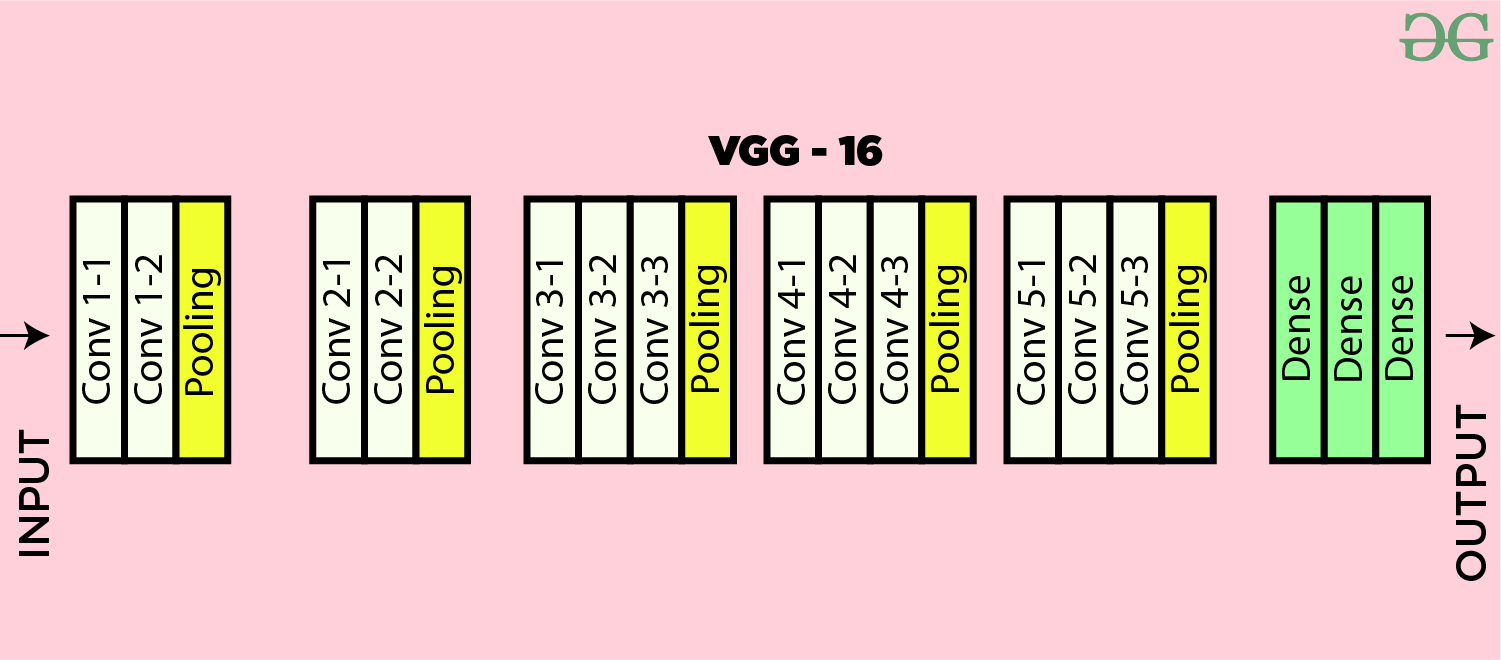

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

In [12]:
model = Sequential()

# Layer1 Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Layer2 Convolution
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Layer3 Flatten
model.add(Flatten())

# Dense Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))

# Output Layer
model.add(Dense(10, activation='softmax'))


In [13]:
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=20)

Epoch 1/20
1250/1250 [==============================] - 27s 15ms/step - loss: 1.6552 - accuracy: 0.4534 - val_loss: 1.6796 - val_accuracy: 0.4269
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1089 - accuracy: 0.6110 - val_loss: 1.0255 - val_accuracy: 0.6424
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9341 - accuracy: 0.6710 - val_loss: 0.8935 - val_accuracy: 0.6821
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8449 - accuracy: 0.7049 - val_loss: 0.9067 - val_accuracy: 0.6900
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7709 - accuracy: 0.7329 - val_loss: 0.7233 - val_accuracy: 0.7429
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.7196 - accuracy: 0.7494 - val_loss: 0.6990 - val_accuracy: 0.7551
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6724 - accuracy: 0.7657 - val_loss: 0.7177 - va

### Plot the learning curve

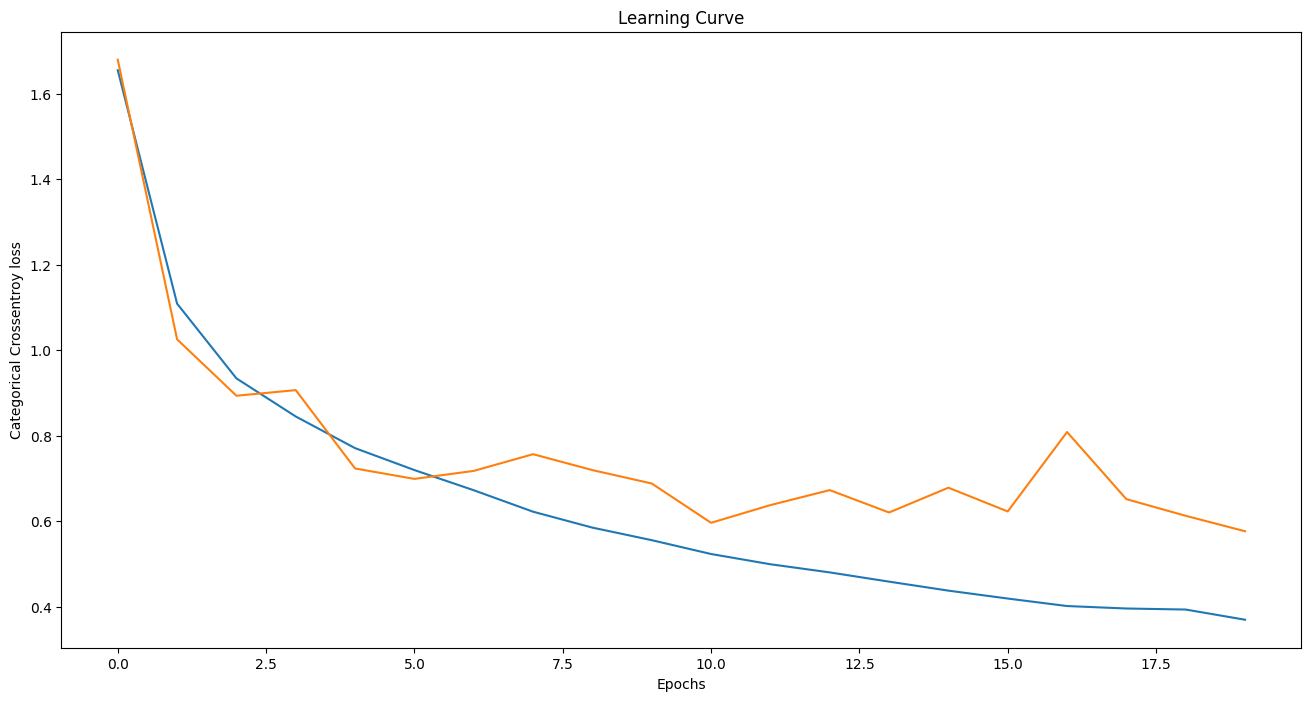

In [15]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentroy loss')
plt.title('Learning Curve')
plt.show()

### Evaluate the model

In [16]:
model.evaluate(xtrain_scl, ytrain_cat)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.2231 - accuracy: 0.9318


[0.22309669852256775, 0.9317600131034851]

In [17]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.6066 - accuracy: 0.8056


[0.6066360473632812, 0.8055999875068665]

### Predicting the labels

In [18]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [20]:
yprob_tr[0]

array([1.0322957e-07, 7.2246685e-08, 1.9023891e-03, 1.8864255e-02,
       2.1561536e-05, 1.2251465e-02, 9.6690369e-01, 5.4724122e-05,
       1.6044680e-06, 5.9877124e-08], dtype=float32)

In [21]:
import numpy as np
ypred_tr = np.argmax(yprob_tr, axis=-1)
ypred_ts = np.argmax(yprob_ts, axis=-1)

In [22]:
ypred_tr[0:5]

array([6, 9, 9, 4, 1])

In [23]:
ytrain[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
ypred_ts[0:5]

array([3, 8, 8, 0, 6])

In [25]:
ytest[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

### Confusion Matrix

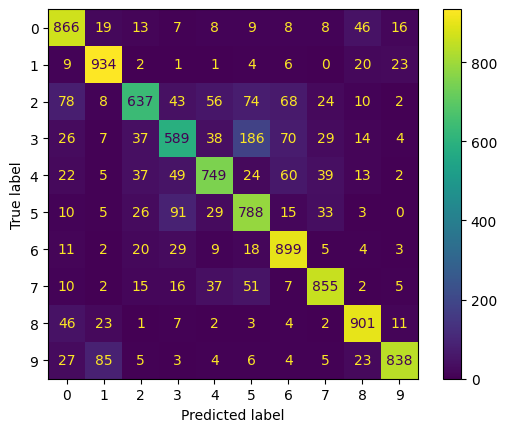

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.86      0.93      0.89      1000
           2       0.80      0.64      0.71      1000
           3       0.71      0.59      0.64      1000
           4       0.80      0.75      0.77      1000
           5       0.68      0.79      0.73      1000
           6       0.79      0.90      0.84      1000
           7       0.85      0.85      0.85      1000
           8       0.87      0.90      0.89      1000
           9       0.93      0.84      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



### Save the model for future use

In [29]:
model.save('cifar10model.keras')